# Graph clustering by Louvain

In [13]:
from sknetwork.clustering import Louvain
from sknetwork.toy_graphs import karate_club_graph
from collections import Counter
from networkx import from_scipy_sparse_matrix, draw

In [17]:
import matplotlib as plt

In [18]:
%matplotlib inline

## Load graph

In [3]:
adjacency = karate_club_graph()
adjacency

<34x34 sparse matrix of type '<class 'numpy.int64'>'
	with 156 stored elements in Compressed Sparse Row format>

## Clustering

In [4]:
louvain = Louvain()
louvain.fit(adjacency)

Louvain(algorithm=GreedyModularity(resolution=1, tol=0.001, engine='numba'), agg_tol=0.001, max_agg_iter=-1, shuffle_nodes=False, verbose=False)

In [7]:
labels = louvain.labels_

In [8]:
Counter(labels)

Counter({1: 12, 0: 5, 3: 11, 2: 6})

## Visualization

In [14]:
graph = from_scipy_sparse_matrix(adjacency)

In [15]:
colors = ['r','g','b','c','m','y']

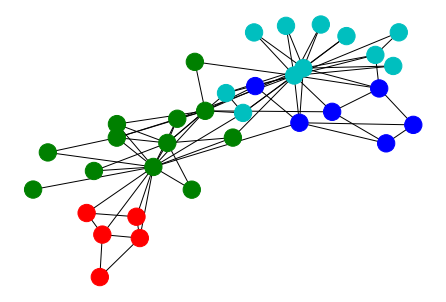

In [19]:
draw(graph, node_color=[colors[labels[i]] for i in graph])